In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
# !pip install pyreadstat

In [2]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

In [3]:
geo = pd.read_csv('../data/YCOM6.0_2021_Data_.csv', encoding='latin-1')

In [4]:
df.shape

(22416, 54)

In [5]:
df.happening.value_counts()

Yes           14915
Don't know     3818
No             3612
Refused          71
Name: happening, dtype: int64

In [6]:
df['target'] = [int(val == 'Yes') for val in df.happening]

In [7]:
df.columns[26:39]

Index(['generation', 'educ', 'educ_category', 'income', 'income_category',
       'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo',
       'registered_voter', 'region9', 'region4'],
      dtype='object')

In [8]:
df.isnull().sum()[13:26]/22416

harm_dev_countries     0.000000
harm_future_gen        0.000000
harm_plants_animals    0.059333
when_harm_US           0.000000
reg_CO2_pollutant      0.045057
reg_utilities          0.224215
fund_research          0.000000
reg_coal_emissions     0.405871
discuss_GW             0.000000
hear_GW_media          0.609252
gender                 0.000000
age                    0.000000
age_category           0.000000
dtype: float64

Review `harm_dev_countries`

In [9]:
list(df.harm_dev_countries.unique())

['A great deal',
 'Only a little',
 'Not at all',
 'A moderate amount',
 "Don't know",
 'Refused']

In [10]:
df.harm_dev_countries.value_counts(normalize = True)

A great deal         0.326240
A moderate amount    0.244334
Not at all           0.147573
Only a little        0.146547
Don't know           0.129327
Refused              0.005978
Name: harm_dev_countries, dtype: float64

In [11]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [12]:
df.harm_dev_countries = df.harm_dev_countries.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

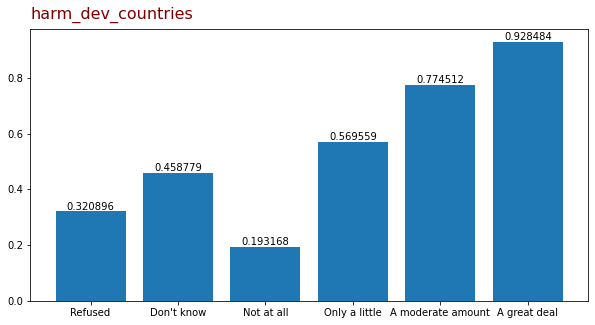

In [13]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('harm_dev_countries').mean().index,
        height = df.groupby('harm_dev_countries').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals);
ax.set_title("harm_dev_countries", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

Review `harm_future_gen`

In [14]:
list(df.harm_future_gen.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused']

In [15]:
df.harm_future_gen.value_counts(normalize = True)

A great deal         0.464311
A moderate amount    0.192630
Don't know           0.119022
Not at all           0.116301
Only a little        0.102115
Refused              0.005621
Name: harm_future_gen, dtype: float64

In [16]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [17]:
df.harm_future_gen = df.harm_future_gen.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

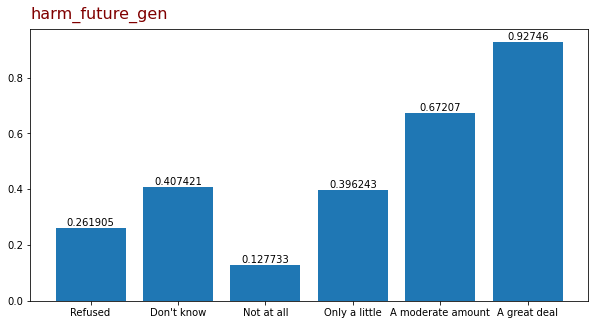

In [18]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('harm_future_gen').mean().index,
        height = df.groupby('harm_future_gen').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals);
ax.set_title("harm_future_gen", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

Review `harm_plants_animals`

In [19]:
list(df.harm_plants_animals.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused',
 nan]

In [20]:
df.harm_plants_animals.isnull().sum()

1330

In [21]:
df.harm_plants_animals.value_counts(normalize = True)

A great deal         0.453381
A moderate amount    0.200512
Not at all           0.117139
Only a little        0.112539
Don't know           0.110073
Refused              0.006355
Name: harm_plants_animals, dtype: float64

In [22]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [23]:
df.harm_plants_animals = df.harm_plants_animals.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

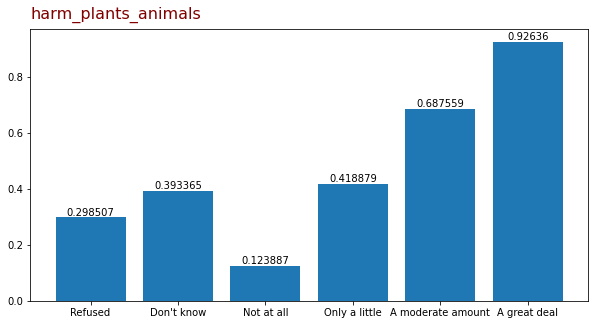

In [24]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('harm_plants_animals').mean().index,
        height = df.groupby('harm_plants_animals').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals);
ax.set_title("harm_plants_animals", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

Review `when_harm_US`

In [25]:
list(df.when_harm_US.unique())

['In 10 years',
 'In 50 years',
 'Never',
 'In 25 years',
 'In 100 years',
 'They are being harmed now',
 'Refused']

In [26]:
df.when_harm_US.value_counts(normalize = True)

They are being harmed now    0.343995
Never                        0.172823
In 25 years                  0.128346
In 100 years                 0.119602
In 50 years                  0.116569
In 10 years                  0.109431
Refused                      0.009234
Name: when_harm_US, dtype: float64

In [27]:
ordinals = ['Refused', '', 'Never', 'In 100 years', 'In 50 years', 'In 25 years'
            , 'In 10 years','They are being harmed now']

In [28]:
df.when_harm_US = df.when_harm_US.replace(
                                {val: i for i,val in zip(range(-1,7),ordinals)})

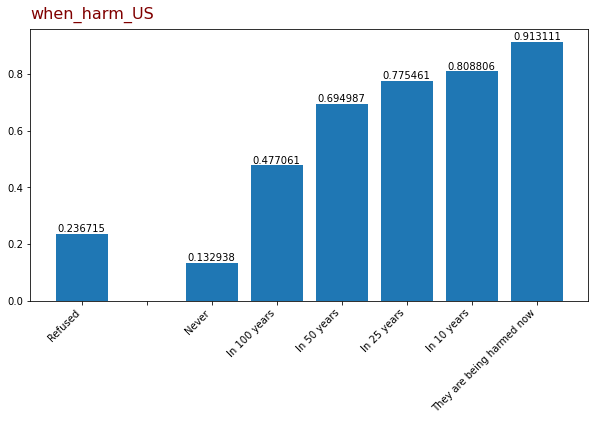

In [29]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('when_harm_US').mean().index,
        height = df.groupby('when_harm_US').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,7))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("when_harm_US", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

Review `reg_CO2_pollutant`

In [43]:
list(df.reg_CO2_pollutant.unique())

['Strongly support',
 'Somewhat support',
 'Somewhat oppose',
 'Strongly oppose',
 'Refused',
 nan]

In [44]:
df.reg_CO2_pollutant.isnull().sum()

1010

In [45]:
df.reg_CO2_pollutant.value_counts(normalize = True)

Somewhat support    0.448706
Strongly support    0.282584
Somewhat oppose     0.143184
Strongly oppose     0.100299
Refused             0.025227
Name: reg_CO2_pollutant, dtype: float64

In [37]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [46]:
df.reg_CO2_pollutant = df.reg_CO2_pollutant.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

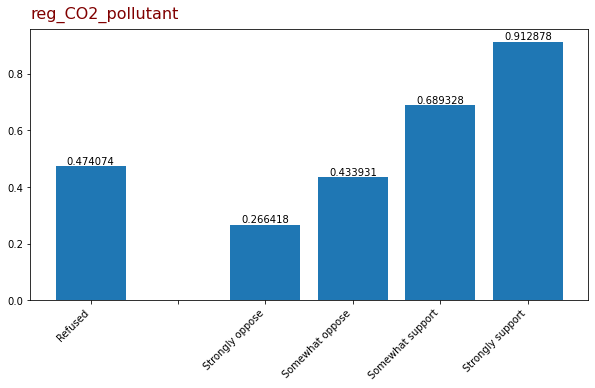

In [50]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('reg_CO2_pollutant').mean().index,
        height = df.groupby('reg_CO2_pollutant').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("reg_CO2_pollutant", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');